In [2]:
# Import statements
import numpy as np
import pandas as pd
import os
import sys

In [3]:
# Load the data into pandas frame
path = './data/articles1.csv'
if os.path.exists(path):
    chunk_list = []
    reader_obj = pd.read_csv(path,chunksize=10000) 
    try:
        for chunk in reader_obj:
            chunk_list.append(chunk)
        data_frame = pd.concat(chunk_list).drop(['Unnamed: 0'],axis=1)
        print(data_frame.columns)
    except:
        # handle the file not found error
        print(sys.exc_info())

Index(['id', 'title', 'publication', 'author', 'date', 'year', 'month', 'url',
       'content'],
      dtype='object')


## Display a simple text

In [4]:
# Displaying a sample content
sample_content = data_frame['content'][10]
print(sample_content)

With Donald J. Trump about to take control of the White House, it would seem a dark time for the renewable energy industry. After all, Mr. Trump has mocked the science of global warming as a Chinese hoax, threatened to kill a global deal on climate change and promised to restore the coal industry to its former glory. So consider what happened in the middle of December, after investors had had a month to absorb the implications of Mr. Trump’s victory. The federal government opened bidding on a tract of the ocean floor off New York State as a potential site for a huge wind farm. Up, up and away soared the offers  —   interest from the bidders was so fevered that the auction went through 33 rounds and spilled over to a second day. In the end, the winning bidder offered the federal Treasury $42 million, more than twice what the government got in August for oil leases  —   oil leases  —   in the Gulf of Mexico. Who won the bid? None other than Statoil, the Norwegian oil company, which is in

# Tokenization
### Tokenizations is the process of separating each and every small letter of the sentence.

# Removal of Stop Words: 
### In this process we are also eliminating the stop words in order to extract only words 


In [5]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
def tokenization(content):
    tokenizer = RegexpTokenizer(r'\w+')
    token_list = tokenizer.tokenize(content.lower())
    return token_list
token_list = tokenization(sample_content)
print(token_list)
print(len(token_list))

['with', 'donald', 'j', 'trump', 'about', 'to', 'take', 'control', 'of', 'the', 'white', 'house', 'it', 'would', 'seem', 'a', 'dark', 'time', 'for', 'the', 'renewable', 'energy', 'industry', 'after', 'all', 'mr', 'trump', 'has', 'mocked', 'the', 'science', 'of', 'global', 'warming', 'as', 'a', 'chinese', 'hoax', 'threatened', 'to', 'kill', 'a', 'global', 'deal', 'on', 'climate', 'change', 'and', 'promised', 'to', 'restore', 'the', 'coal', 'industry', 'to', 'its', 'former', 'glory', 'so', 'consider', 'what', 'happened', 'in', 'the', 'middle', 'of', 'december', 'after', 'investors', 'had', 'had', 'a', 'month', 'to', 'absorb', 'the', 'implications', 'of', 'mr', 'trump', 's', 'victory', 'the', 'federal', 'government', 'opened', 'bidding', 'on', 'a', 'tract', 'of', 'the', 'ocean', 'floor', 'off', 'new', 'york', 'state', 'as', 'a', 'potential', 'site', 'for', 'a', 'huge', 'wind', 'farm', 'up', 'up', 'and', 'away', 'soared', 'the', 'offers', 'interest', 'from', 'the', 'bidders', 'was', 'so', 

In [6]:
import nltk
nltk.download('words')
words = set(nltk.corpus.words.words())
def remove_non_english(content):
    return " ".join(w for w in nltk.wordpunct_tokenize(content) 
            if w.lower() in words or not w.isalpha())

[nltk_data] Downloading package words to C:\Users\Dharmang
[nltk_data]     Solanki\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [7]:
from nltk.corpus import stopwords
def stop_words_filter(token_list):
    stopword_set = set(stopwords.words('english'))    
    filtered_tokens = []
    for token in token_list:
        if token not in stopword_set and token.isnumeric() == False:
            filtered_tokens.append(token)
    return filtered_tokens

filtered_tokens = stop_words_filter(token_list)
print(filtered_tokens)

['donald', 'j', 'trump', 'take', 'control', 'white', 'house', 'would', 'seem', 'dark', 'time', 'renewable', 'energy', 'industry', 'mr', 'trump', 'mocked', 'science', 'global', 'warming', 'chinese', 'hoax', 'threatened', 'kill', 'global', 'deal', 'climate', 'change', 'promised', 'restore', 'coal', 'industry', 'former', 'glory', 'consider', 'happened', 'middle', 'december', 'investors', 'month', 'absorb', 'implications', 'mr', 'trump', 'victory', 'federal', 'government', 'opened', 'bidding', 'tract', 'ocean', 'floor', 'new', 'york', 'state', 'potential', 'site', 'huge', 'wind', 'farm', 'away', 'soared', 'offers', 'interest', 'bidders', 'fevered', 'auction', 'went', 'rounds', 'spilled', 'second', 'day', 'end', 'winning', 'bidder', 'offered', 'federal', 'treasury', 'million', 'twice', 'government', 'got', 'august', 'oil', 'leases', 'oil', 'leases', 'gulf', 'mexico', 'bid', 'none', 'statoil', 'norwegian', 'oil', 'company', 'midst', 'major', 'campaign', 'turn', 'big', 'player', 'renewable', 

### As you can see we were able to remove a lot of unnecessary words from the tokens

### Stemming and lemmatization
#### For grammatical reasons, documents are going to use different forms of a word, such as organize, organizes, and organizing. Additionally, there are families of derivationally related words with similar meanings, such as democracy, democratic, and democratization. In many situations, it seems as if it would be useful for a search for one of these words to return documents that contain another word in the set.

#### The goal of both stemming and lemmatization is to reduce inflectional forms and sometimes derivationally related forms of a word to a common base form. For instance:

#### &emsp;  &emsp; am, are, is $\Rightarrow$ be
#### &emsp;  &emsp; car, cars, car's, cars' $\Rightarrow$ car
#### The result of this mapping of text will be something like:
#### &emsp;  &emsp; the boy's cars are different colors $\Rightarrow$
#### &emsp;  &emsp; the boy car be differ color
#### However, the two words differ in their flavor. Stemming usually refers to a crude heuristic process that chops off the ends of words in the hope of achieving this goal correctly most of the time, and often includes the removal of derivational affixes. Lemmatization usually refers to doing things properly with the use of a vocabulary and morphological analysis of words, normally aiming to remove inflectional endings only and to return the base or dictionary form of a word, which is known as the lemma . If confronted with the token saw, stemming might return just s, whereas lemmatization would attempt to return either see or saw depending on whether the use of the token was as a verb or a noun. The two may also differ in that stemming most commonly collapses derivationally related words, whereas lemmatization commonly only collapses the different inflectional forms of a lemma. Linguistic processing for stemming or lemmatization is often done by an additional plug-in component to the indexing process, and a number of such components exist, both commercial and open-source.

#### For more information refer: https://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html

### NOTE: In the below method if you uncomment the two print lines you will be able to see what this function is doing. This will help to improve the performance of count-based clustering techniques. Also it will reduce the size of sparse matrix.

#### Example there are many examples which are being lemmatized like 
##### eg 1 . rounds => round 
##### eg 2 . leases => lease
##### eg 3 . jobs => job
##### eg 4 . appointees => appointee


In [8]:
# Lemmatization 
from nltk.stem import WordNetLemmatizer
def lemmatize_tokens(filtered_tokens):
    lemmatized = []
    lemmatizer = WordNetLemmatizer()
    for token in filtered_tokens:
        lemmatized.append(lemmatizer.lemmatize(token))
        #print("token: " + token)
        #print("Lemmantized "+lemmatizer.lemmatize(token))
    lemmatized_string = ' '.join(lemmatized)
    return lemmatized_string
lemmatized_string = lemmatize_tokens(filtered_tokens)

In [9]:
# Create a data pipeline to process the dataset 
from nltk.tokenize import word_tokenize
def data_preprocessing(data_frame):

    res = pd.DataFrame()
    '''

    # Step 1: Tokenization
    tmp_data_frame = data_frame['content'][0:1000].apply(lambda row:tokenization(row))

    # Step 2: Remove stop words
    tmp_data_frame = tmp_data_frame.apply(lambda row: stop_words_filter(row))

    # Step 3: Make a string
    tmp_data_frame = tmp_data_frame.apply(lambda row: ' '.join(row))

    res = pd.concat([res,tmp_data_frame])

    '''
    total_records = len(data_frame)  #50000
    start = 0 
    interval = ((total_records - start) // 50 ) #1000
    # The processing in chunks will reduce the memory load
    for i in range(start,total_records,interval):
        
        print(i)
        # Step 1: Tokenization
        tmp_data_frame = data_frame['content'][i:i+interval].apply(lambda row:tokenization(row))
        
        # Step 2: Remove stop words
        tmp_data_frame = tmp_data_frame.apply(lambda row: stop_words_filter(row))
        
        # Step 3: Make a string
        tmp_data_frame = tmp_data_frame.apply(lambda row: ' '.join(row))
        
        #Step 4: Reomve non-english words
        tmp_data_frame = tmp_data_frame.apply(lambda row: remove_non_english(row))
            
        res = pd.concat([res,tmp_data_frame])
        
    res.columns = ['content']
    return res

df = data_preprocessing(data_frame)
print(df.shape)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
(50000, 1)


In [10]:
from sklearn.feature_extraction.text import CountVectorizer
def create_sparse_mat(corpus):
    vectorizer = CountVectorizer()
    x = vectorizer.fit_transform(corpus)
    word_features = vectorizer.get_feature_names()
    return x

sparse_mat = create_sparse_mat(df['content'])
print(sparse_mat.shape)    


(50000, 42013)


In [11]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
vectorizer = TfidfTransformer()
sparse_mat = vectorizer.fit_transform(sparse_mat)


In [12]:
from sklearn.decomposition import TruncatedSVD
pca = TruncatedSVD(n_components=100)
sparse_mat = pca.fit_transform(sparse_mat)

In [13]:
#kmeans = KMeans(n_clusters=10, random_state=0).fit(sparse_mat)
#l = kmeans.labels_

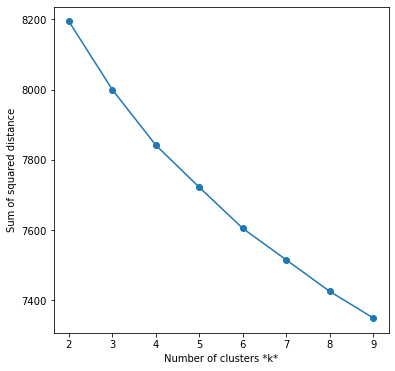

In [22]:
#kmeans2 = KMeans(n_clusters=20, random_state=0).fit(sparse_mat)
#l2 = kmeans2.labels_
from matplotlib import pyplot as plt
from sklearn import metrics
from collections import Counter
sse = []
davies_score =[]
list_k = list(range(2, 10))
for k in list_k:
    kmeans = KMeans(n_clusters=k, random_state = 0).fit(sparse_mat)
    l = kmeans.labels_
    result = metrics.davies_bouldin_score(sparse_mat, l)
    davies_score.append(result)
    sse.append(kmeans.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');


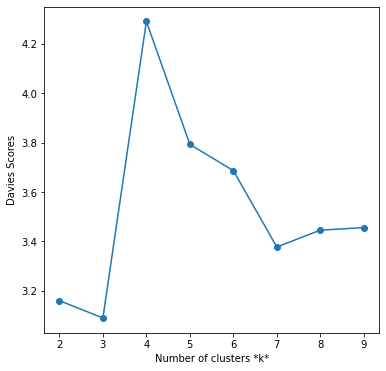

In [23]:
plt.figure(figsize=(6, 6))
plt.plot(list_k, davies_score, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Davies Scores');
